Nama    : Ilham Khodar Trijaya

NIM     : 1103213084

Tugas  : Model Affinity Propagation Clustering Week 6

Dataset : dataset Mall_Customer.csv

Dokumentasi ChatGPT : https://chat.openai.com/share/23e5cab5-563c-4c12-b881-ec1b24ba14cb

**PROMPT CHATGPT IMPORT DRIVE** : berikan kode python untuk mengubungkan drive pada google colab

In [1]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [10]:
#1 Impor library yang diperlukan
import numpy as np
import pandas as pd
from sklearn.cluster import AffinityPropagation
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn import metrics

In [3]:
#2 Membaca dataset dari file CSV
file_path = "/content/drive/MyDrive/Dataset/Mall_Customers.csv"
data = pd.read_csv(file_path)

In [4]:
#3 Mengambil fitur yang akan digunakan untuk clustering
X = data.iloc[:, [3, 4]].values  # Menggunakan 'Annual Income' dan 'Spending Score'

In [5]:
#4 Normalisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
#5 Menerapkan Affinity Propagation Clustering
clustering = AffinityPropagation().fit(X_scaled)
cluster_centers_indices = clustering.cluster_centers_indices_
labels = clustering.labels_
n_clusters_ = len(cluster_centers_indices)

print("Jumlah cluster yang ditemukan:", n_clusters_)

Jumlah cluster yang ditemukan: 11


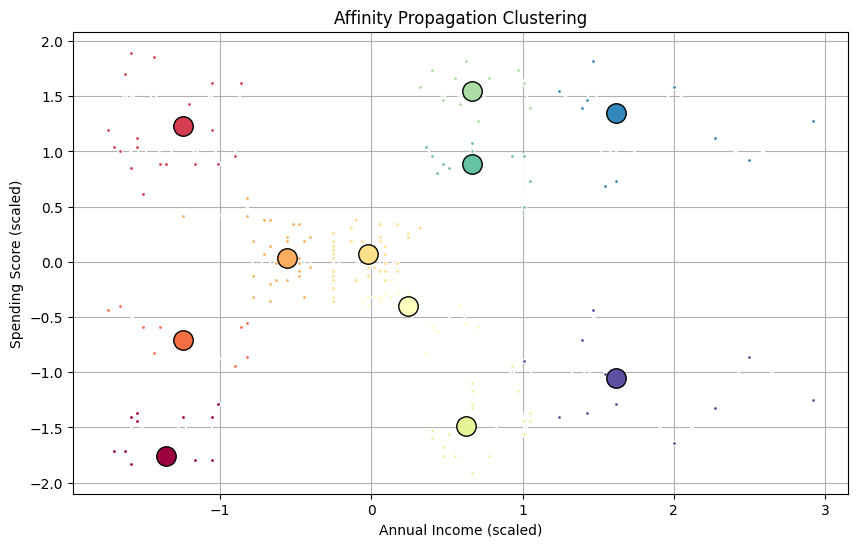

In [15]:
#6 Visualisasi hasil clustering
plt.figure(figsize=(10, 6))
colors = plt.cm.Spectral(np.linspace(0, 1, n_clusters_))

for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_scaled[cluster_centers_indices[k]]
    plt.plot(X_scaled[class_members, 0], X_scaled[class_members, 1], 'w', markerfacecolor=col, marker='.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=14)

plt.title('Affinity Propagation Clustering')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.grid(True)
plt.show()